# Police Overtime
## A CS506 project analyzing the trends around BPD overtime budget

In [69]:
## IMPORTS
import requests
import pandas as pd
import os
import matplotlib.pyplot as plt

In [70]:
## DOWNLOAD CSV DATASETS FROM ANALYZE BOSTON

# Create a data directory if it doesn't exist
os.makedirs('data', exist_ok=True)

# List of URLs for each year's data
urls = [
    'https://data.boston.gov/datastore/dump/6b3c5333-1dcb-4b3d-9cd7-6a03fb526da7?bom=True',  # 2023
    'https://data.boston.gov/datastore/dump/63ac638b-36c4-487d-9453-1d83eb5090d2?bom=True',  # 2022
    'https://data.boston.gov/datastore/dump/ec5aaf93-1509-4641-9310-28e62e028457?bom=True',  # 2021
    'https://data.boston.gov/datastore/dump/e2e2c23a-6fc7-4456-8751-5321d8aa869b?bom=True',  # 2020
    'https://data.boston.gov/datastore/dump/3bdfe6dc-3a81-49ce-accc-22161e2f7e74?bom=True',  # 2019
    'https://data.boston.gov/datastore/dump/31358fd1-849a-48e0-8285-e813f6efbdf1?bom=True',  # 2018
    'https://data.boston.gov/datastore/dump/70129b87-bd4e-49bb-aa09-77644da73503?bom=True',  # 2017
    'https://data.boston.gov/datastore/dump/8368bd3d-3633-4927-8355-2a2f9811ab4f?bom=True',  # 2016
    'https://data.boston.gov/datastore/dump/2ff6343f-850d-46e7-98d1-aca79b619fd6?bom=True',  # 2015
    'https://data.boston.gov/datastore/dump/941c9de4-fb91-41bb-ad5a-43a35f5dc80f?bom=True'   # 2014
]

# Loop over the URLs and download each CSV
start_year = 2023
for i, url in enumerate(urls):
    year = start_year - i
    response = requests.get(url)
    # Check if the request was successful
    if response.status_code == 200:
        filename = f'data/data_{year}.csv' # Name file by year
        with open(filename, 'wb') as file:
            file.write(response.content)
        print(f'Successfully downloaded data for {year}')
    else:
        print(f'Failed to download data for {year}. Status code: {response.status_code}')

# Load and combine all CSVs into a single DataFrame
dataframes = []
for year in range(2023, 2013, -1):
    df = pd.read_csv(f'data/data_{year}.csv')
    df['year'] = year  # Add a column for the year
    dataframes.append(df)

# Combine all DataFrames into one
all_data = pd.concat(dataframes, ignore_index=True)

# Display the combined data
print(all_data.head(10))


Successfully downloaded data for 2023
Successfully downloaded data for 2022
Successfully downloaded data for 2021
Successfully downloaded data for 2020
Successfully downloaded data for 2019
Successfully downloaded data for 2018
Successfully downloaded data for 2017
Successfully downloaded data for 2016
Successfully downloaded data for 2015
Successfully downloaded data for 2014
   _id                   NAME           DEPARTMENT_NAME  \
0    1       Demesmin,Stanley  Boston Police Department   
1    2          Hosein,Haseeb  Boston Police Department   
2    3        Conway,Kendra J  Boston Police Department   
3    4           Smith,Sean P  Boston Police Department   
4    5       Danilecki,John H  Boston Police Department   
5    6          Gero,Jarrod A  Boston Police Department   
6    7         Skipper,Mary E   Superintendent's Office   
7    8       Connolly,Timothy  Boston Police Department   
8    9  Grandson IV,Charles A                  Strategy   
9   10      Barrett,Thomas E. 

### From the add_data.head() above, we can see that due to each csv file having a different naming convention for headers, the data is a mess. The first step of the data cleaning is thus to standardize the data headers.

In [71]:
## ADD YEAR COLUMN TO EACH CSV FILE
data_dir = 'data'

# Loop through each CSV file in the data directory
for filename in os.listdir(data_dir):
    if filename.endswith('.csv'):
        # Extract the year from the filename
        year = filename.split('_')[1].split('.')[0]
        
        # Read the CSV file into a DataFrame
        file_path = os.path.join(data_dir, filename)
        df = pd.read_csv(file_path)
        
        # Check if 'year' column exists, and if not, add it
        if 'year' not in df.columns:
            df['year'] = int(year)
            # Save the updated DataFrame back to the CSV file
            df.to_csv(file_path, index=False)
            print(f"Added 'year' column to {filename}")
        else:
            print(f"'year' column already exists in {filename}")


Added 'year' column to data_2021.csv
Added 'year' column to data_2020.csv
Added 'year' column to data_2022.csv
Added 'year' column to data_2023.csv
Added 'year' column to data_2018.csv
Added 'year' column to data_2019.csv
Added 'year' column to data_2014.csv
Added 'year' column to data_2015.csv
Added 'year' column to data_2017.csv
Added 'year' column to data_2016.csv


In [72]:
## ANALYZE CSV FILE HEADERS

headers_dict = {}
# Loop through each CSV file in the data directory
for filename in os.listdir(data_dir):
    if filename.endswith('.csv'):
        # Extract the year from the filename
        year = int(filename.split('_')[1].split('.')[0])
        
        # Read only the header row
        df = pd.read_csv(os.path.join(data_dir, filename), nrows=0)
        
        # Store the headers in the dictionary
        headers_dict[year] = list(df.columns)

# Display all headers for each year
for year, headers in headers_dict.items():
    print(f"Year: {year}, Headers: {headers}")
    print("-" * 80)

Year: 2021, Headers: ['_id', 'NAME', 'DEPARTMENT_NAME', 'TITLE', 'REGULAR', 'RETRO', 'OTHER', 'OVERTIME', 'INJURED', 'DETAIL', 'QUINN_EDUCATION_INCENTIVE', 'TOTAL_GROSS', 'POSTAL', 'year']
--------------------------------------------------------------------------------
Year: 2020, Headers: ['_id', 'NAME', 'DEPARTMENT_NAME', 'TITLE', 'REGULAR', 'RETRO', 'OTHER', 'OVERTIME', 'INJURED', 'DETAIL', 'QUINN / EDUCATION INCENTIVE', 'TOTAL EARNINGS', 'POSTAL', 'year']
--------------------------------------------------------------------------------
Year: 2022, Headers: ['_id', 'NAME', 'DEPARTMENT_NAME', 'TITLE', 'REGULAR', 'RETRO', 'OTHER', 'OVERTIME', 'INJURED', 'DETAIL', 'QUINN_EDUCATION', 'TOTAL_ GROSS', 'POSTAL', 'year']
--------------------------------------------------------------------------------
Year: 2023, Headers: ['_id', 'NAME', 'DEPARTMENT_NAME', 'TITLE', 'REGULAR', 'RETRO', 'OTHER', 'OVERTIME', 'INJURED', 'DETAIL', 'QUINN_EDUCATION', 'TOTAL GROSS', 'POSTAL', 'year']
---------------

In [73]:
## STANDARDIZE COLUMN NAMES

# Target headers mapping to standardize all headers to the 2023 version
target_headers = {
    '_id': '_id',
    'NAME': 'NAME',
    'TITLE': 'TITLE',
    'DEPARTMENT NAME': 'DEPARTMENT_NAME',
    'DEPARTMENT_NAME': 'DEPARTMENT_NAME',
    'REGULAR': 'REGULAR',
    'RETRO': 'RETRO',
    'OTHER': 'OTHER',
    'OVERTIME': 'OVERTIME',
    'INJURED': 'INJURED',
    'DETAIL': 'DETAIL',
    'DETAILS': 'DETAIL',
    'QUINN': 'QUINN_EDUCATION',
    'QUINN/EDUCATION INCENTIVE': 'QUINN_EDUCATION',
    'QUINN / EDUCATION INCENTIVE': 'QUINN_EDUCATION',
    'QUINN_EDUCATION_INCENTIVE': 'QUINN_EDUCATION',
    'QUINN_EDUCATION': 'QUINN_EDUCATION',
    'TOTAL EARNINGS': 'TOTAL_GROSS',
    'TOTAL_ GROSS': 'TOTAL_GROSS',
    'TOTAL GROSS': 'TOTAL_GROSS',
    'ZIP': 'POSTAL',
    'POSTAL': 'POSTAL',
    'year': 'year'
}

# Standardize headers for each CSV file
for filename in os.listdir(data_dir):
    if filename.endswith('.csv'):
        file_path = os.path.join(data_dir, filename)
        
        # Load the CSV file
        df = pd.read_csv(file_path)
        
        # Rename columns according to target headers
        df.rename(columns=target_headers, inplace=True)
        
        # Save the updated DataFrame back to the CSV file
        df.to_csv(file_path, index=False)
        print(f"Standardized headers for {filename}")


Standardized headers for data_2021.csv
Standardized headers for data_2020.csv
Standardized headers for data_2022.csv
Standardized headers for data_2023.csv
Standardized headers for data_2018.csv
Standardized headers for data_2019.csv
Standardized headers for data_2014.csv
Standardized headers for data_2015.csv
Standardized headers for data_2017.csv
Standardized headers for data_2016.csv


In [74]:
## CHECK CSV HEADERS AFTER STANDARDIZATION

# Loop through each CSV file in the data directory
for filename in os.listdir(data_dir):
    if filename.endswith('.csv'):
        # Extract the year from the filename
        year = filename.split('_')[1].split('.')[0]
        
        # Read only the header row
        df = pd.read_csv(os.path.join(data_dir, filename), nrows=0)
        
        # Store the headers in the dictionary
        headers_dict[year] = list(df.columns)

# Display all headers for each year
for year, headers in headers_dict.items():
    print(f"Year: {year}, Headers: {headers}")
    print("-" * 80)

Year: 2021, Headers: ['_id', 'NAME', 'DEPARTMENT_NAME', 'TITLE', 'REGULAR', 'RETRO', 'OTHER', 'OVERTIME', 'INJURED', 'DETAIL', 'QUINN_EDUCATION_INCENTIVE', 'TOTAL_GROSS', 'POSTAL', 'year']
--------------------------------------------------------------------------------
Year: 2020, Headers: ['_id', 'NAME', 'DEPARTMENT_NAME', 'TITLE', 'REGULAR', 'RETRO', 'OTHER', 'OVERTIME', 'INJURED', 'DETAIL', 'QUINN / EDUCATION INCENTIVE', 'TOTAL EARNINGS', 'POSTAL', 'year']
--------------------------------------------------------------------------------
Year: 2022, Headers: ['_id', 'NAME', 'DEPARTMENT_NAME', 'TITLE', 'REGULAR', 'RETRO', 'OTHER', 'OVERTIME', 'INJURED', 'DETAIL', 'QUINN_EDUCATION', 'TOTAL_ GROSS', 'POSTAL', 'year']
--------------------------------------------------------------------------------
Year: 2023, Headers: ['_id', 'NAME', 'DEPARTMENT_NAME', 'TITLE', 'REGULAR', 'RETRO', 'OTHER', 'OVERTIME', 'INJURED', 'DETAIL', 'QUINN_EDUCATION', 'TOTAL GROSS', 'POSTAL', 'year']
---------------

With the data now being standardized across years, because the employee earnings data contains data for every public servant under the payroll of Boston, we need to extract the data only related to BPD (DEPARTMENT_NAME="Boston Police Department").

In [75]:
## EXTRACT DATA RELATED TO BPD

# Initialize an empty list to store filtered DataFrames
bpd_data = []

# Loop through each CSV file in the data directory
for filename in os.listdir(data_dir):
    if filename.endswith('.csv'):
        file_path = os.path.join(data_dir, filename)
        
        # Load the CSV file
        df = pd.read_csv(file_path)
        
        # Check if 'DEPARTMENT_NAME' column exists (in case of unexpected missing columns)
        if 'DEPARTMENT_NAME' in df.columns:
            # Filter rows where DEPARTMENT_NAME is "Boston Police Department"
            bpd_df = df[df['DEPARTMENT_NAME'] == "Boston Police Department"]
            # Append the filtered data to the list
            bpd_data.append(bpd_df)
        else:
            print(f"DEPARTMENT_NAME column missing in {filename}")

# Concatenate all filtered DataFrames
merged_bpd_data = pd.concat(bpd_data, ignore_index=True)

# Save the merged DataFrame to a CSV file
merged_bpd_data.to_csv('BPD_salary.csv', index=False)
print("Merged data saved to BPD_salary.csv")


Merged data saved to BPD_salary.csv


In [76]:
merged_bpd_data

,_id,NAME,DEPARTMENT_NAME,TITLE,REGULAR,RETRO,OTHER,OVERTIME,INJURED,DETAIL,QUINN_EDUCATION,TOTAL_GROSS,POSTAL,year
0,1,"Beckers,Richard",Boston Police Department,Police Officer,NaN,NaN,"1,264,843.63",NaN,NaN,NaN,NaN,"1,264,843.63",02119,2021
1,2,"McGowan,Jacqueline M.",Boston Police Department,Police Officer,NaN,NaN,"1,252,990.81",NaN,NaN,NaN,NaN,"1,252,990.81",02129,2021
2,3,"Harris,Shawn N",Boston Police Department,Police Offc Comm Serv Offc 3$8,"69,772.10",NaN,"212,739.48","82,300.87","30,939.24","12,144.00","25,178.06","433,073.75",02130,2021
3,4,"Washington,Walter",Boston Police Department,Police Officer,"100,963.38",NaN,"211,900.28","67,849.66",NaN,"9,016.00","10,096.55","399,825.87",02368,2021
4,5,"Mosley Jr.,Curtis",Boston Police Department,Police Offc Comm Serv Offc 3$8,"109,858.02",NaN,"192,097.54","75,938.65",NaN,"19,550.00",NaN,"397,444.21",02301,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31201,21996,"Zelvis,Paul J",Boston Police Department,Police Sergeant/CHF RADIO DISP,"$113,003.48",NaN,$800.00,"$80,017.45",NaN,"$33,655.00","$20,903.36","$248,379.29",02332,2016
31202,22020,"Zingg,Robert M",Boston Police Department,Police Detective,"$97,455.29","$107,368.53","$8,793.52","$69,739.29",$178.89,$736.00,$714.10,"$284,985.62",02090,2016
31203,22030,"Zographos,Peter A.",Boston Police Department,Police Offc Mobile Offc 2$6,"$80,939.04",NaN,"$3,300.00","$20,242.39",NaN,$368.00,"$12,194.26","$117,043.69",02132,2016
31204,22038,"Zubrin,William W.",Boston Police Department,Police Detective,"$82,297.70",NaN,"$5,207.64","$72,372.52",NaN,$736.00,"$12,393.44","$173,007.30",02122,2016


## After this, there is still a problem with the numerical data columns, as some are prefixed with the `$` symbol and some are not. For easy data processing in the future, let us remove the use of `$` symbols altogether and convert the columns to a float type.

### NOTE:
    There is also an abnormal row with an abnormal salary that we took account of:  
    16,"Hartgrove,Christopher A",Police Detective,Boston Police Department,($380.71),$174.05 ,"$16,078.64 ",,"$106,392.37 ",,,"$122,264.35 ",2066,2017


In [77]:
## REMOVE $ SYMBOLS FROM SALARY COLUMNS

# Load the merged data
bpd_data = pd.read_csv('BPD_salary.csv')

# List of salary categories to clean
salary_categories = ['REGULAR', 'RETRO', 'OTHER', 'OVERTIME', 'INJURED', 'DETAIL', 'QUINN_EDUCATION', 'TOTAL_GROSS']

# Clean each salary category column
for category in salary_categories:
    if category in bpd_data.columns:
        # Remove '$' symbol and handle negative values in parentheses
        bpd_data[category] = bpd_data[category].replace('[\$,]', '', regex=True)  # Remove $ symbol
        bpd_data[category] = bpd_data[category].replace(r'\(([^)]+)\)', r'-\1', regex=True)  # Convert (value) to -value
        bpd_data[category] = pd.to_numeric(bpd_data[category], errors='coerce')  # Convert to float, setting non-numeric values to NaN

# Save the cleaned data back to the file
bpd_data.to_csv('BPD_salary.csv', index=False)
print("Standardized salary columns in BPD_salary.csv, handling $ symbols and negative values in parentheses")


Standardized salary columns in BPD_salary.csv, handling $ symbols and negative values in parentheses


In [78]:
bpd_data

,_id,NAME,DEPARTMENT_NAME,TITLE,REGULAR,RETRO,OTHER,OVERTIME,INJURED,DETAIL,QUINN_EDUCATION,TOTAL_GROSS,POSTAL,year
0,1,"Beckers,Richard",Boston Police Department,Police Officer,NaN,NaN,1264843.63,NaN,NaN,NaN,NaN,1264843.63,02119,2021
1,2,"McGowan,Jacqueline M.",Boston Police Department,Police Officer,NaN,NaN,1252990.81,NaN,NaN,NaN,NaN,1252990.81,02129,2021
2,3,"Harris,Shawn N",Boston Police Department,Police Offc Comm Serv Offc 3$8,69772.10,NaN,212739.48,82300.87,30939.24,12144.0,25178.06,433073.75,02130,2021
3,4,"Washington,Walter",Boston Police Department,Police Officer,100963.38,NaN,211900.28,67849.66,NaN,9016.0,10096.55,399825.87,02368,2021
4,5,"Mosley Jr.,Curtis",Boston Police Department,Police Offc Comm Serv Offc 3$8,109858.02,NaN,192097.54,75938.65,NaN,19550.0,NaN,397444.21,02301,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31201,21996,"Zelvis,Paul J",Boston Police Department,Police Sergeant/CHF RADIO DISP,113003.48,NaN,800.00,80017.45,NaN,33655.0,20903.36,248379.29,02332,2016
31202,22020,"Zingg,Robert M",Boston Police Department,Police Detective,97455.29,107368.53,8793.52,69739.29,178.89,736.0,714.10,284985.62,02090,2016
31203,22030,"Zographos,Peter A.",Boston Police Department,Police Offc Mobile Offc 2$6,80939.04,NaN,3300.00,20242.39,NaN,368.0,12194.26,117043.69,02132,2016
31204,22038,"Zubrin,William W.",Boston Police Department,Police Detective,82297.70,NaN,5207.64,72372.52,NaN,736.0,12393.44,173007.30,02122,2016


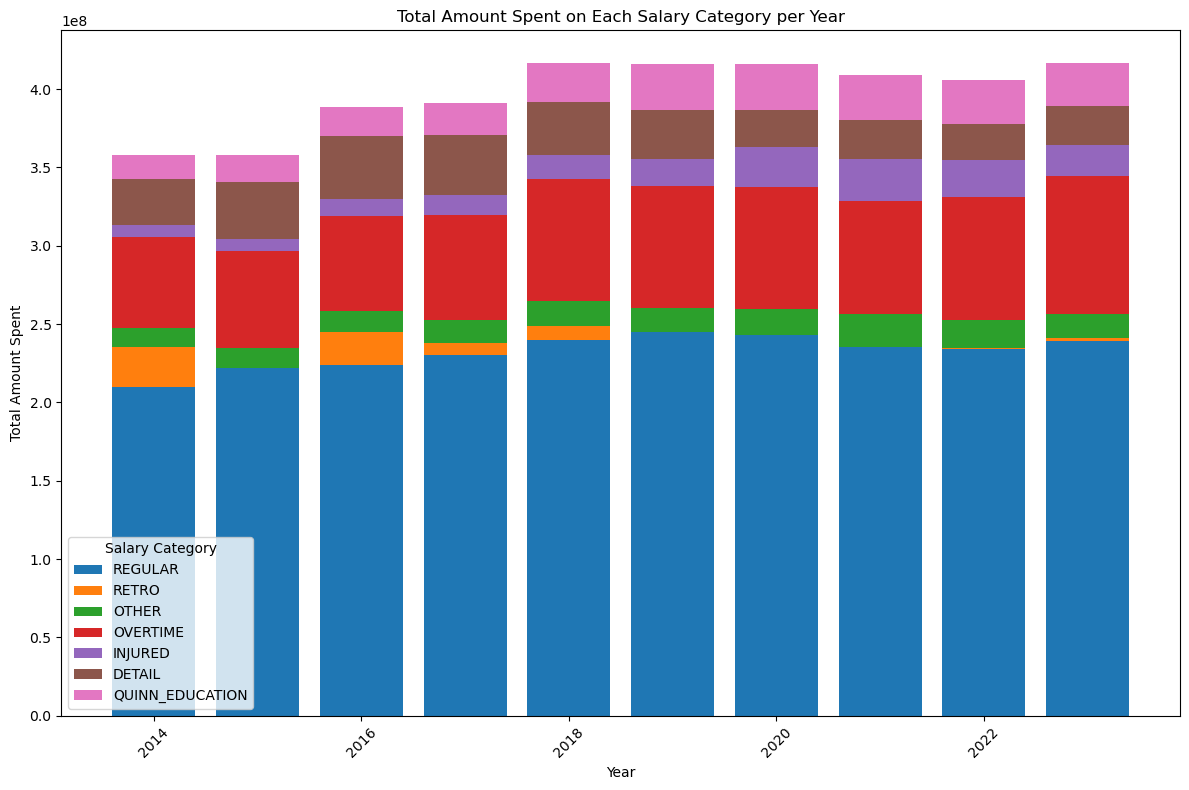

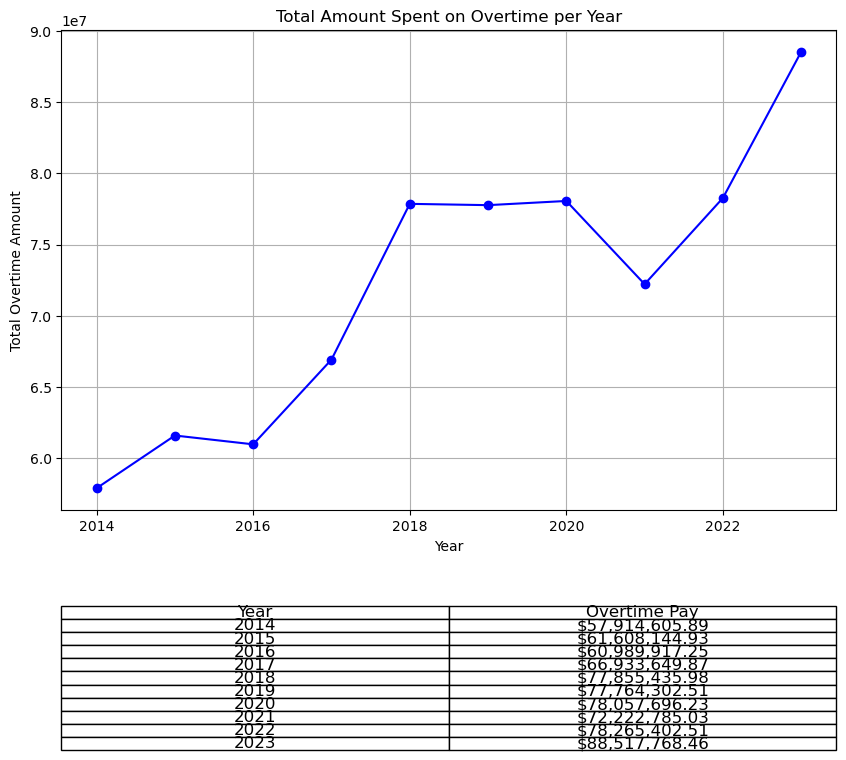

In [79]:
## PLOT GENERAL AND OVERTIME SALARY TREND

# Load the merged data
bpd_data = pd.read_csv('BPD_salary.csv')

# List of salary categories to analyze
salary_categories = ['REGULAR', 'RETRO', 'OTHER', 'OVERTIME', 'INJURED', 'DETAIL', 'QUINN_EDUCATION']

# Group by 'year' and calculate the total amount spent for each salary category
yearly_totals = bpd_data.groupby('year')[salary_categories].sum()

# Plot a stacked bar chart
plt.figure(figsize=(12, 8))
bottom = None  # For stacking bars

# Iterate through each category to plot each as a stacked component
for category in salary_categories:
    if bottom is None:
        bottom = yearly_totals[category]
        plt.bar(yearly_totals.index, yearly_totals[category], label=category)
    else:
        plt.bar(yearly_totals.index, yearly_totals[category], bottom=bottom, label=category)
        bottom += yearly_totals[category]  # Update the bottom position for stacking

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Total Amount Spent')
plt.title('Total Amount Spent on Each Salary Category per Year')
plt.legend(title="Salary Category")
plt.xticks(rotation=45)  # Rotate year labels if necessary
plt.tight_layout()

# Show the plot
plt.show()

# Group by 'year' and calculate the total amount spent on overtime
overtime_totals = bpd_data.groupby('year')['OVERTIME'].sum()

# Create a figure with two subplots: one for the plot and one for the table
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the overtime totals
ax.plot(overtime_totals.index, overtime_totals.values, marker='o', linestyle='-', color='b', label='Overtime')

# Add labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Total Overtime Amount')
ax.set_title('Total Amount Spent on Overtime per Year')
ax.grid(True)

# Prepare the table data
table_data = [[year, f"${amount:,.2f}"] for year, amount in zip(overtime_totals.index, overtime_totals.values)]
column_labels = ["Year", "Overtime Pay"]

# Create a larger table and increase font size
table = plt.table(cellText=table_data, colLabels=column_labels, cellLoc='center', loc='bottom', bbox=[0, -0.5, 1, 0.3])
table.auto_set_font_size(False)
table.set_fontsize(12)

# Adjust layout to make room for the larger table
plt.subplots_adjust(bottom=0.4)

# Display the plot with the larger table
plt.show()




# Data Preprocessing 

In [91]:
#import pandas as pd

# Load the data
data = bpd_data

# Check for missing values
missing_info = data.isnull().sum()
print("Missing value information:")
print(missing_info)


Missing value information:
_id                 0
NAME                0
DEPARTMENT_NAME     0
TITLE               0
REGULAR             0
RETRO               0
OTHER               0
OVERTIME            0
INJURED             0
DETAIL              0
QUINN_EDUCATION     0
TOTAL_GROSS         0
POSTAL             14
year                0
dtype: int64


In [92]:
data

,_id,NAME,DEPARTMENT_NAME,TITLE,REGULAR,RETRO,OTHER,OVERTIME,INJURED,DETAIL,QUINN_EDUCATION,TOTAL_GROSS,POSTAL,year
0,1,"Beckers,Richard",Boston Police Department,Police Officer,0.00,0.00,1264843.63,0.00,0.00,0.0,0.00,1264843.63,02119,2021
1,2,"McGowan,Jacqueline M.",Boston Police Department,Police Officer,0.00,0.00,1252990.81,0.00,0.00,0.0,0.00,1252990.81,02129,2021
2,3,"Harris,Shawn N",Boston Police Department,Police Offc Comm Serv Offc 3$8,69772.10,0.00,212739.48,82300.87,30939.24,12144.0,25178.06,433073.75,02130,2021
3,4,"Washington,Walter",Boston Police Department,Police Officer,100963.38,0.00,211900.28,67849.66,0.00,9016.0,10096.55,399825.87,02368,2021
4,5,"Mosley Jr.,Curtis",Boston Police Department,Police Offc Comm Serv Offc 3$8,109858.02,0.00,192097.54,75938.65,0.00,19550.0,0.00,397444.21,02301,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31201,21996,"Zelvis,Paul J",Boston Police Department,Police Sergeant/CHF RADIO DISP,113003.48,0.00,800.00,80017.45,0.00,33655.0,20903.36,248379.29,02332,2016
31202,22020,"Zingg,Robert M",Boston Police Department,Police Detective,97455.29,107368.53,8793.52,69739.29,178.89,736.0,714.10,284985.62,02090,2016
31203,22030,"Zographos,Peter A.",Boston Police Department,Police Offc Mobile Offc 2$6,80939.04,0.00,3300.00,20242.39,0.00,368.0,12194.26,117043.69,02132,2016
31204,22038,"Zubrin,William W.",Boston Police Department,Police Detective,82297.70,0.00,5207.64,72372.52,0.00,736.0,12393.44,173007.30,02122,2016


In [93]:
# Convert relevant columns to numeric type
columns_to_convert = ['REGULAR', 'RETRO', 'OTHER', 'OVERTIME', 'INJURED', 'DETAIL', 'QUINN_EDUCATION', 'TOTAL_GROSS']
for column in columns_to_convert:
    data[column] = pd.to_numeric(data[column], errors='coerce')
# Display data types and statistical summary
print("\nData types:")
print(data.dtypes)
print("\nStatistical summary:")
print(data.describe())



Data types:
_id                  int64
NAME                object
DEPARTMENT_NAME     object
TITLE               object
REGULAR            float64
RETRO              float64
OTHER              float64
OVERTIME           float64
INJURED            float64
DETAIL             float64
QUINN_EDUCATION    float64
TOTAL_GROSS        float64
POSTAL              object
year                 int64
dtype: object

Statistical summary:
                _id        REGULAR          RETRO         OTHER  \
count  31206.000000   31206.000000   31206.000000  3.120600e+04   
mean    8237.189066   74441.923738    2110.470118  4.963334e+03   
std     7333.345006   38056.672033    8086.963892  1.567496e+04   
min        1.000000  -17515.440000    -137.850000 -4.806600e+02   
25%     1586.250000   51695.422500       0.000000  8.000000e+02   
50%     5498.500000   83276.090000       0.000000  8.500000e+02   
75%    15195.750000   98757.700000       0.000000  5.206440e+03   
max    25501.000000  517789.820000  1

In [94]:
# Fill missing values in income-related columns with zero
income_columns = ['REGULAR', 'RETRO', 'OTHER', 'OVERTIME', 'INJURED', 'DETAIL', 'QUINN_EDUCATION', 'TOTAL_GROSS']
data[income_columns] = data[income_columns].fillna(0)

# Fill missing values in 'POSTAL' with the mode (most common postal code)
data = data.drop(columns=['POSTAL'])

# Confirm missing values have been handled
print("Missing values after handling:")
print(data.isnull().sum())


Missing values after handling:
_id                0
NAME               0
DEPARTMENT_NAME    0
TITLE              0
REGULAR            0
RETRO              0
OTHER              0
OVERTIME           0
INJURED            0
DETAIL             0
QUINN_EDUCATION    0
TOTAL_GROSS        0
year               0
dtype: int64


In [95]:
# drop irrelevant cols
full_data=data
data = data.drop(columns=['NAME'])
data = data.drop(columns=['_id'])
data = data.drop(columns=['DEPARTMENT_NAME'])
# Let's delete title for now, since we didn't find any effective encoding method for it
data = data.drop(columns=['TITLE'])

In [96]:
data

,REGULAR,RETRO,OTHER,OVERTIME,INJURED,DETAIL,QUINN_EDUCATION,TOTAL_GROSS,year
0,0.00,0.00,1264843.63,0.00,0.00,0.0,0.00,1264843.63,2021
1,0.00,0.00,1252990.81,0.00,0.00,0.0,0.00,1252990.81,2021
2,69772.10,0.00,212739.48,82300.87,30939.24,12144.0,25178.06,433073.75,2021
3,100963.38,0.00,211900.28,67849.66,0.00,9016.0,10096.55,399825.87,2021
4,109858.02,0.00,192097.54,75938.65,0.00,19550.0,0.00,397444.21,2021
...,...,...,...,...,...,...,...,...,...
31201,113003.48,0.00,800.00,80017.45,0.00,33655.0,20903.36,248379.29,2016
31202,97455.29,107368.53,8793.52,69739.29,178.89,736.0,714.10,284985.62,2016
31203,80939.04,0.00,3300.00,20242.39,0.00,368.0,12194.26,117043.69,2016
31204,82297.70,0.00,5207.64,72372.52,0.00,736.0,12393.44,173007.30,2016


# Feature Selection

In [97]:
from sklearn.preprocessing import StandardScaler

# Select numeric columns to scale
numeric_features = ['REGULAR', 'RETRO', 'OTHER', 'DETAIL', 'QUINN_EDUCATION', 'TOTAL_GROSS']
scaler = StandardScaler()
data[numeric_features] = scaler.fit_transform(data[numeric_features])


In [98]:
# Calculate correlation with target variable (OVERTIME)
correlations = data.corr()['OVERTIME'].abs().sort_values(ascending=False)
print("Feature correlations with OVERTIME:")
print(correlations)


Feature correlations with OVERTIME:
OVERTIME           1.000000
TOTAL_GROSS        0.742354
REGULAR            0.568665
QUINN_EDUCATION    0.341742
DETAIL             0.207934
INJURED            0.167176
year               0.113902
RETRO              0.110435
OTHER              0.045850
Name: OVERTIME, dtype: float64


## From the result above, OTHER is not very relavant to OVERTIME, let's ignore it for now

## Then, let's test the dependency between features

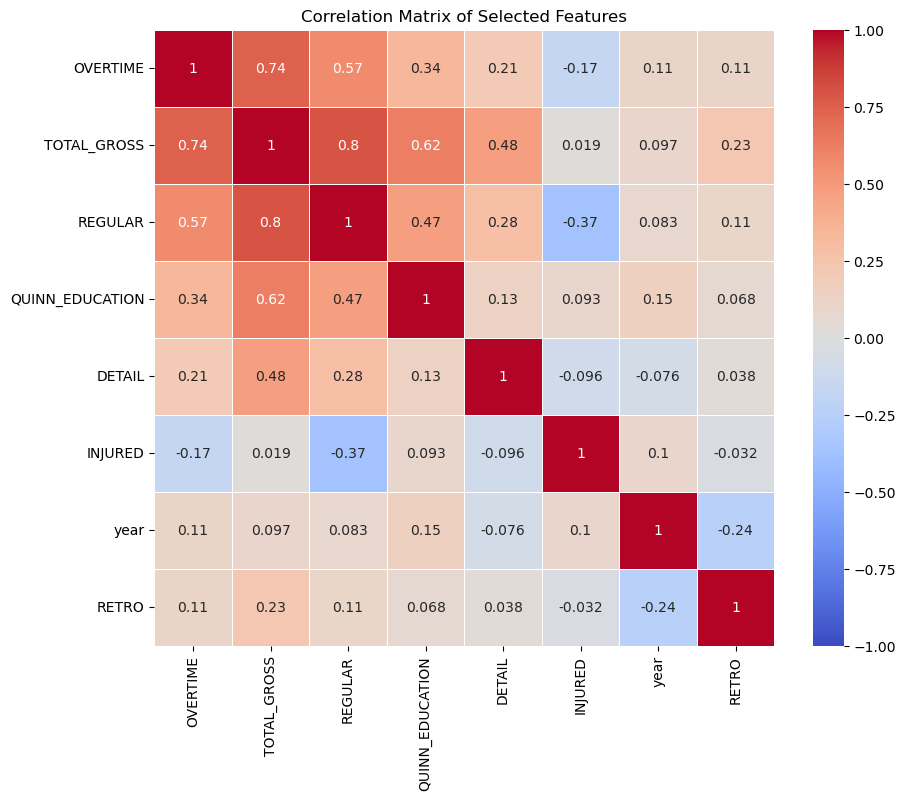

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = data[['OVERTIME', 'TOTAL_GROSS', 'REGULAR', 'QUINN_EDUCATION', 'DETAIL', 'INJURED', "year", "RETRO"]].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title("Correlation Matrix of Selected Features")
plt.show()


In [100]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Select the features to calculate VIF
features_for_vif = data[['TOTAL_GROSS', 'REGULAR', 'QUINN_EDUCATION', 'DETAIL', 'INJURED', "year", "RETRO"]]

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = features_for_vif.columns
vif_data["VIF"] = [variance_inflation_factor(features_for_vif.values, i) for i in range(features_for_vif.shape[1])]

print("Variance Inflation Factor (VIF) for each feature:")
print(vif_data)


Variance Inflation Factor (VIF) for each feature:
           Feature       VIF
0      TOTAL_GROSS  7.385600
1          REGULAR  5.556616
2  QUINN_EDUCATION  1.757397
3           DETAIL  1.616011
4          INJURED  2.089348
5             year  1.147699
6            RETRO  1.156529


## From the result above, we see TOTAL_GROSS and REGULAR are highly dependent, we can thus remove REGULAR and see what will happen

In [101]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Select the features to calculate VIF
features_for_vif = data[['TOTAL_GROSS', 'QUINN_EDUCATION', 'DETAIL', 'INJURED', "year", "RETRO"]]

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = features_for_vif.columns
vif_data["VIF"] = [variance_inflation_factor(features_for_vif.values, i) for i in range(features_for_vif.shape[1])]

print("Variance Inflation Factor (VIF) for each feature:")
print(vif_data)


Variance Inflation Factor (VIF) for each feature:
           Feature       VIF
0      TOTAL_GROSS  2.331154
1  QUINN_EDUCATION  1.745749
2           DETAIL  1.395927
3          INJURED  1.100452
4             year  1.077822
5            RETRO  1.081371


## Thus, TOTAL_GROSS and REGULAR are highly dependent. But since the correlation between REGULAR and overtime is pretty high, let's keep it for now.

## Then, lets sort the features by their important using RandomForestRegressor

In [102]:
# Selecting features with high correlation to OVERTIME
selected_features = ['TOTAL_GROSS', 'REGULAR', 'QUINN_EDUCATION', 'DETAIL', 'INJURED', "year", "RETRO"]
X = data[selected_features]
y = data['OVERTIME']

# Output the selected features and target
print("Selected features for model training:")
print(X.head())
print("\nTarget variable (OVERTIME):")
print(y.head())


Selected features for model training:
   TOTAL_GROSS   REGULAR  QUINN_EDUCATION    DETAIL   INJURED  year     RETRO
0    16.019304 -1.956112        -0.740881 -0.542380      0.00  2021 -0.260976
1    15.852373 -1.956112        -0.740881 -0.542380      0.00  2021 -0.260976
2     4.304968 -0.122709         1.697307  0.129314  30939.24  2021 -0.260976
3     3.836717  0.696905         0.236846 -0.043698      0.00  2021 -0.260976
4     3.803174  0.930630        -0.740881  0.538945      0.00  2021 -0.260976

Target variable (OVERTIME):
0        0.00
1        0.00
2    82300.87
3    67849.66
4    75938.65
Name: OVERTIME, dtype: float64


In [103]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Initialize random forest model
model = RandomForestRegressor(random_state=42)
model.fit(X, y)

# Calculate feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

print("Feature importance using Random Forest:")
print(feature_importances)


Feature importance using Random Forest:
           Feature  Importance
0      TOTAL_GROSS    0.670980
1          REGULAR    0.125912
3           DETAIL    0.088576
2  QUINN_EDUCATION    0.065097
6            RETRO    0.023793
4          INJURED    0.017904
5             year    0.007738


## As we can see from the result above, the importance of year is very small, thus we can remove it by now.

## Therefore, the features that we are going to use to train our model are TOTAL_GROSS, REGULAR, DETAIL, QUINN_EDUCATION, RETRO, INJURED 

In [104]:
selected_features = ['TOTAL_GROSS', 'REGULAR', 'QUINN_EDUCATION', 'DETAIL', 'INJURED', "RETRO"]

# Modeling

## linear regression for analyze of overtime
best R^2= 0.822899

In [138]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load data (assuming 'data' is your DataFrame)
# Define dependent and independent variables
X = data[['REGULAR', 'RETRO', 'DETAIL', 'QUINN_EDUCATION', 'TOTAL_GROSS', 'INJURED']]
y = data['OVERTIME']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predictions
y_pred = linear_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2 Score: {r2}")

# Feature Importance (Coefficients)
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': linear_model.coef_})
print("\nFeature Importance:")
print(coefficients)
print("Intercept:", linear_model.intercept_)



Mean Absolute Error: 6429.265077273116
Root Mean Squared Error: 10595.289997530128
R^2 Score: 0.8228994310168102

Feature Importance:
           Feature   Coefficient
0          REGULAR -18264.441127
1            RETRO  -4836.432095
2           DETAIL -10469.225874
3  QUINN_EDUCATION  -6985.599672
4      TOTAL_GROSS  43884.231013
5          INJURED     -0.636035
Intercept: 26523.261944926264


### the regression shows a acceptable R^2 of 0.822899

### try to modify the loss function for better result(no, it will not)

#### QuantileRegressor

In [128]:
from sklearn.linear_model import QuantileRegressor

# Train the model with Quantile Loss at the 50th percentile (median)
quantile_model = QuantileRegressor(quantile=0.5)  # 0.5 for median
quantile_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = quantile_model.predict(X_test)
quantile_mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error with Quantile Loss (50th percentile):", quantile_mae)
r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2}")

Mean Absolute Error with Quantile Loss (50th percentile): 18364.18219263354
R^2 Score: -0.04516474925341529


#### negative R^2, extremely bad result   

## XGBoost
best R^2=0.9478210082552645

In [134]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
# Define features and target
X = data[['REGULAR', 'RETRO', 'DETAIL', 'QUINN_EDUCATION', 'TOTAL_GROSS', 'INJURED']]
y = data['OVERTIME']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost Results:")
print(f"Mean Absolute Error: {mae_xgb}")
print(f"Root Mean Squared Error: {rmse_xgb}")
print(f"R^2 Score: {r2_xgb}")

# Feature Importance
xgb_importance = xgb_model.feature_importances_
print("\nXGBoost Feature Importances:")
for feature, importance in zip(X.columns, xgb_importance):
    print(f"{feature}: {importance:.4f}")


XGBoost Results:
Mean Absolute Error: 3120.8100457547534
Root Mean Squared Error: 5751.09724702873
R^2 Score: 0.9478210082552645

XGBoost Feature Importances:
REGULAR: 0.0916
RETRO: 0.0820
DETAIL: 0.1214
QUINN_EDUCATION: 0.0891
TOTAL_GROSS: 0.5497
INJURED: 0.0663


## Regularized Regression
0.8228374879089613

In [137]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import cross_val_score

# Define alpha (regularization strength) for Lasso and Ridge
alpha_value = 1.0

# Initialize and train Lasso Regression
lasso_model = Lasso(alpha=alpha_value, random_state=42)
lasso_model.fit(X_train, y_train)

# Predictions with Lasso
y_pred_lasso = lasso_model.predict(X_test)

# Evaluation
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Lasso Regression Results:")
print(f"Mean Absolute Error: {mae_lasso}")
print(f"Root Mean Squared Error: {rmse_lasso}")
print(f"R^2 Score: {r2_lasso}")
print("Lasso Coefficients:", lasso_model.coef_)

Lasso Regression Results:
Mean Absolute Error: 6432.439294139388
Root Mean Squared Error: 10597.142752202517
R^2 Score: 0.8228374879089613
Lasso Coefficients: [-18249.65267232  -4832.92704752 -10463.41324752  -6981.56919968
  43865.35587136 -12338.78604409]


## XGBoost works well for prediction, for linear regression, have fomula:
**Overtime (Predicted) = 26523.26 - 18264.44 * REGULAR - 4836.43 * RETRO - 10469.23 * DETAIL - 6985.60 * QUINN_EDUCATION + 43884.23 * TOTAL_GROSS - 0.64 * INJURED**


## K-means for outlier

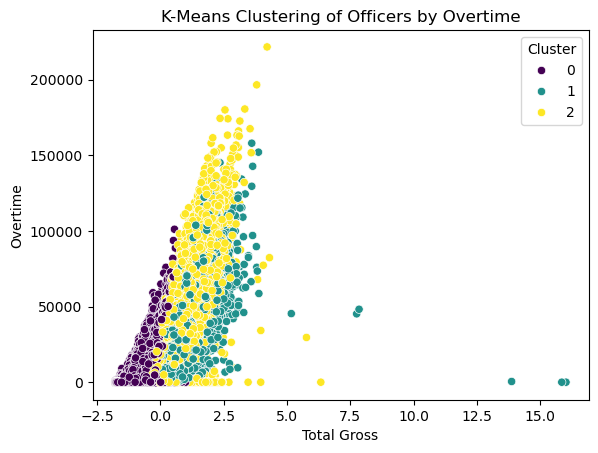

In [65]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Standardize features
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

# Choosing number of clusters using Elbow Method
#inertia = []
#for k in range(1, 11):
#    kmeans = KMeans(n_clusters=k, random_state=42)
#    kmeans.fit(X_scaled)
#    inertia.append(kmeans.inertia_)

# Plotting the Elbow Curve
#plt.figure(figsize=(8, 5))
#plt.plot(range(1, 11), inertia, marker='o')
#plt.title('Elbow Method for Optimal K')
#plt.xlabel('Number of Clusters')
#plt.ylabel('Inertia')
#plt.show()

# Fit K-Means with an optimal number of clusters (e.g., K=3)
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualization of clusters
sns.scatterplot(x='TOTAL_GROSS', y='OVERTIME', hue='Cluster', data=data, palette='viridis')
plt.title("K-Means Clustering of Officers by Overtime")
plt.xlabel("Total Gross")
plt.ylabel("Overtime")
plt.show()


### from the k means clustering, obviously there is some outliers

### find the outlier:

In [110]:
from scipy.stats import zscore

# Calculate the Z-scores for the OVERTIME column
full_data['Overtime_ZScore'] = zscore(full_data['OVERTIME'])

# Define threshold for identifying outliers (e.g., Z-score > 3 or < -3)
outlier_threshold = 5
outliers = full_data[np.abs(full_data['Overtime_ZScore']) > outlier_threshold]

# Print the IDs of the outliers
print("Outliers in Overtime Data (IDs):")
print(outliers['_id'].values)

# Additionally, display the outliers with their relevant information
print("\nOutlier details:")
print(outliers[['_id', 'REGULAR', 'OVERTIME', 'TOTAL_GROSS', 'Overtime_ZScore']])

Outliers in Overtime Data (IDs):
[    7    10    15    47     3     5    79     4    15    20    32   112
     1     4     6     8    10    12    17    40    80   134   152    10
    24    99 10699]

Outlier details:
         _id    REGULAR   OVERTIME  TOTAL_GROSS  Overtime_ZScore
6          7  142466.41  167509.61    378690.01         5.683171
9         10  130930.12  166042.24    346429.04         5.625433
13        15  130930.12  150490.63    335628.31         5.013506
41        47  104644.14  154900.81    297709.26         5.187038
3096       3  132699.44  155123.11    345758.44         5.195785
3098       5  132699.44  156754.23    339352.68         5.259967
3164      79  110587.17  152318.86    284243.09         5.085443
6237       4  145775.26  196515.25    397258.69         6.824490
6244      15  130930.12  163494.70    343881.49         5.525192
6249      20  127626.76  150658.84    329863.15         5.020124
6261      32  136588.74  163269.38    315447.83         5.516326
631

## by find the z-score of all the individuals, we found outliers of Id:
7, 10, 15, 47, 3, 5, 79, 4, 15, 20, 32, 112, 1, 4, 6, 8, 10, 12, 17, 40, 80, 134, 152, 10, 24, 99, 10699


# Visualizations

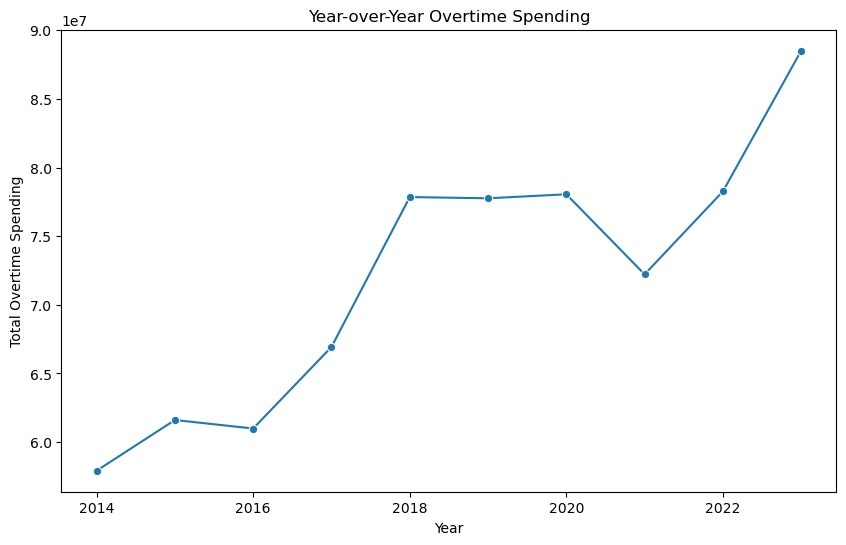

In [130]:
# Aggregating overtime spending by year
overtime_by_year = data.groupby('year')['OVERTIME'].sum().reset_index()

# Line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=overtime_by_year, x='year', y='OVERTIME', marker='o')
plt.title("Year-over-Year Overtime Spending")
plt.xlabel("Year")
plt.ylabel("Total Overtime Spending")
plt.show()


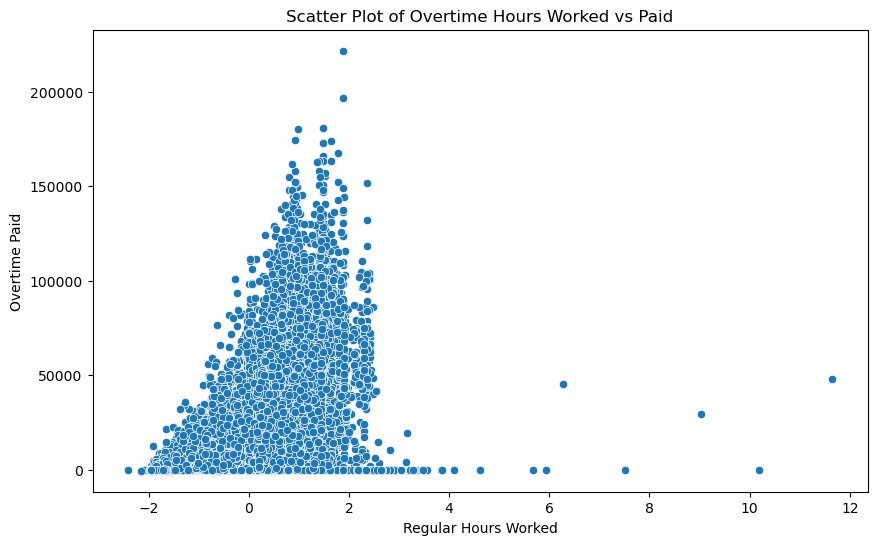

In [131]:
# Assuming 'HOURS_WORKED' and 'HOURS_PAID' columns exist in data (adjust as needed)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='REGULAR', y='OVERTIME')
plt.title("Scatter Plot of Overtime Hours Worked vs Paid")
plt.xlabel("Regular Hours Worked")
plt.ylabel("Overtime Paid")
plt.show()


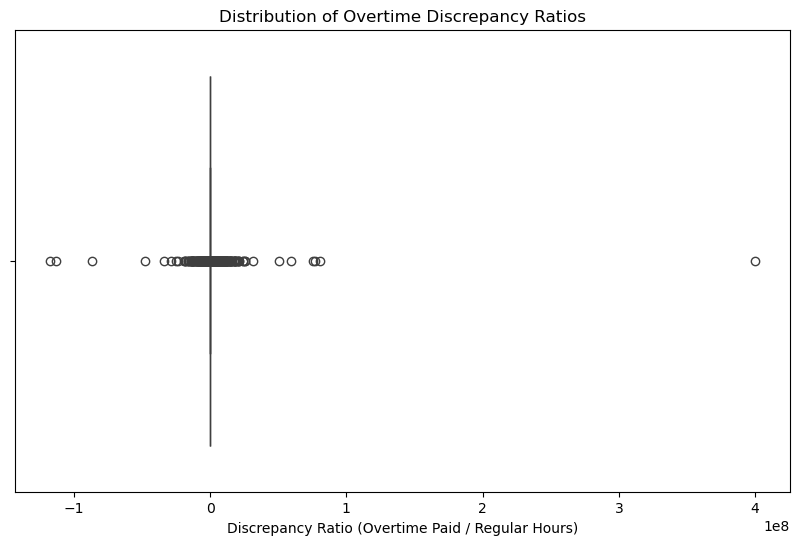

In [132]:
# Assuming discrepancy ratio is calculated (here as 'OVERTIME' / 'REGULAR' for simplicity)
data['Discrepancy_Ratio'] = data['OVERTIME'] / (data['REGULAR'] + 1e-5)  # Avoid division by zero

plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Discrepancy_Ratio')
plt.title("Distribution of Overtime Discrepancy Ratios")
plt.xlabel("Discrepancy Ratio (Overtime Paid / Regular Hours)")
plt.show()
